### Example

* Suppose we have two samples that represent biki ride durations for two distinct neighborhoods `a` and `b`

1. Instead of working with actual data, sample the data from a gaussian the same mean ($\mu=20$) the same same standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    

In [2]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

bikiSampleA = np.random.normal(20, 4, 15)
bikiSampleB = np.random.normal(20, 4, 15)

array([18.76746797, 20.64070354, 14.57312562, 24.94741442, 16.35233769,
       14.30970162, 19.98918036, 22.92856715, 20.86121425, 19.74467135,
       16.35269549, 23.48906556, 19.69796513, 17.12922247, 23.09380411])

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [5]:
sampleMeanA = bikiSampleA.sum()/bikiSampleA.size
sampleMeanB = bikiSampleB.sum()/bikiSampleB.size
print(sampleMeanA, sampleMeanB)

21.18440954886815 19.525142449894712


The difference is not statistically signifigant, because the two values fall within one standard deviation (4) of the mean (20) of the distribution that was sampled from.

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

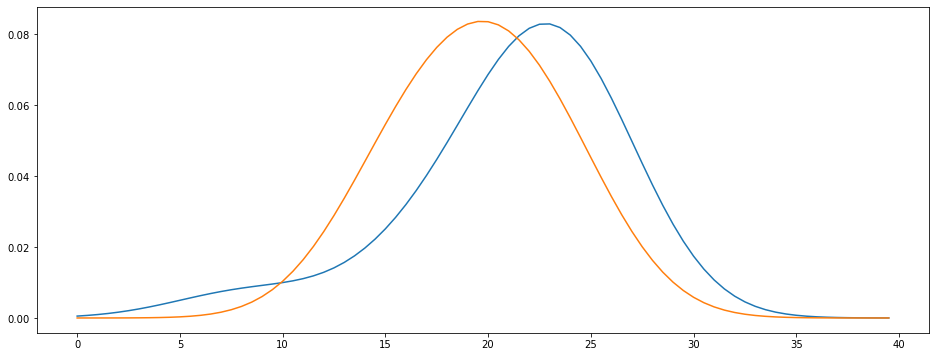

In [17]:
# Write your code here
from scipy import stats

x_axis = np.arange(0,40,0.5)
kde_1 = sp.stats.gaussian_kde(bikiSampleA, bw_method=0.8)
kde_2 = sp.stats.gaussian_kde(bikiSampleB, bw_method=1)
x_densities_1 = kde_1.evaluate(x_axis)
x_densities_2 = kde_2.evaluate(x_axis)

plt.figure(figsize=(16,6))
plt.plot(x_axis, x_densities_1, label="dataset a")
plt.plot(x_axis, x_densities_2, label="dataset b")

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

In [ ]:
# Write your code here
# The datasets do not differ significantly from each other

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [20]:
# Write your code here
plt.figure(figsize=(16,6))

all_data = np.concatenate([bikiSampleA,bikiSampleB])
means_difference = []

for _ in range(1000):
    np.random.shuffle(all_data)
    a_subset = all_data[:20]
    b_subset = all_data[20:]
    means_difference.append(np.mean(a_subset) - np.mean(b_subset))

print(sum(means_difference >= (np.mean(bikiSampleA) - np.mean(bikiSampleB))))
print(sum(means_difference >= (np.mean(bikiSampleA) - np.mean(bikiSampleB))) / len(means_difference))

152
0.152


<Figure size 1152x432 with 0 Axes>

p-value of 0.152 means that there is not statistical significance because the p-value is > 5%

### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

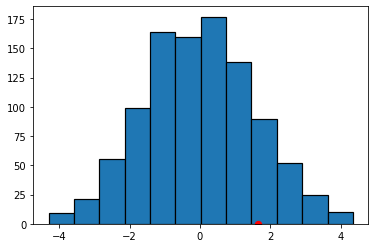

In [21]:
# Write your code here
_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)
plt.scatter(np.mean(bikiSampleA) - np.mean(bikiSampleB), 0, color = "red", s=40)